In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
path = "DataScience_salaries_2024.csv"

df = pd.read_csv(path, usecols=['job_title','experience_level'])
#df = pd.read_csv(path)
#df = df.dropna(axis=0, how='any')
df = df.drop_duplicates()
df

,experience_level,job_title
0,MI,Data Scientist
1,MI,BI Data Analyst
3,MI,ML Engineer
4,SE,Lead Machine Learning Engineer
6,SE,Data Science Manager
...,...,...
14751,EN,Data Analytics Manager
14800,EN,Data Quality Engineer
14818,EN,Data Analytics Engineer
14823,EN,Data Analyst Lead


In [2]:
job_title = df['job_title']
experience_level = df['experience_level']
print("Số lượng ngành nghề:", job_title.nunique())
print("Số lượng mức độ kinh nghiệm:", experience_level.nunique())
print("Số cạnh", len(df))

Số lượng ngành nghề: 153
Số lượng mức độ kinh nghiệm: 4
Số cạnh 334


In [3]:
from networkx.algorithms import bipartite
B = nx.Graph()
for index, row in df.iterrows():
  B.add_edge(row['job_title'], row['experience_level'], weight=1)
B.add_nodes_from(job_title, bipartite=0)
B.add_nodes_from(experience_level, bipartite=1)

<Figure size 1500x1500 with 0 Axes>

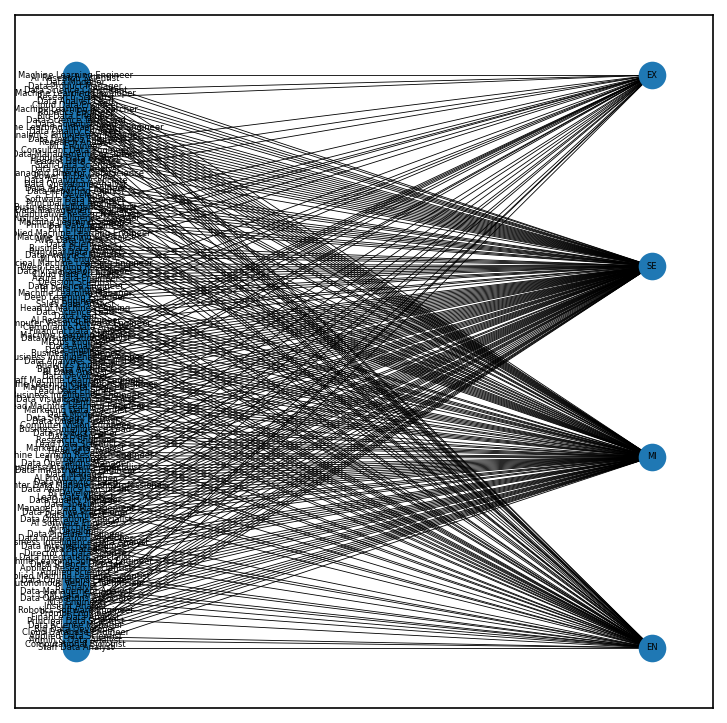

In [4]:
plt.figure(figsize=(15,15))
pos = nx.spring_layout(B, scale = 40)
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi = 150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, job_title), font_size=4, width=0.4, node_size=150)

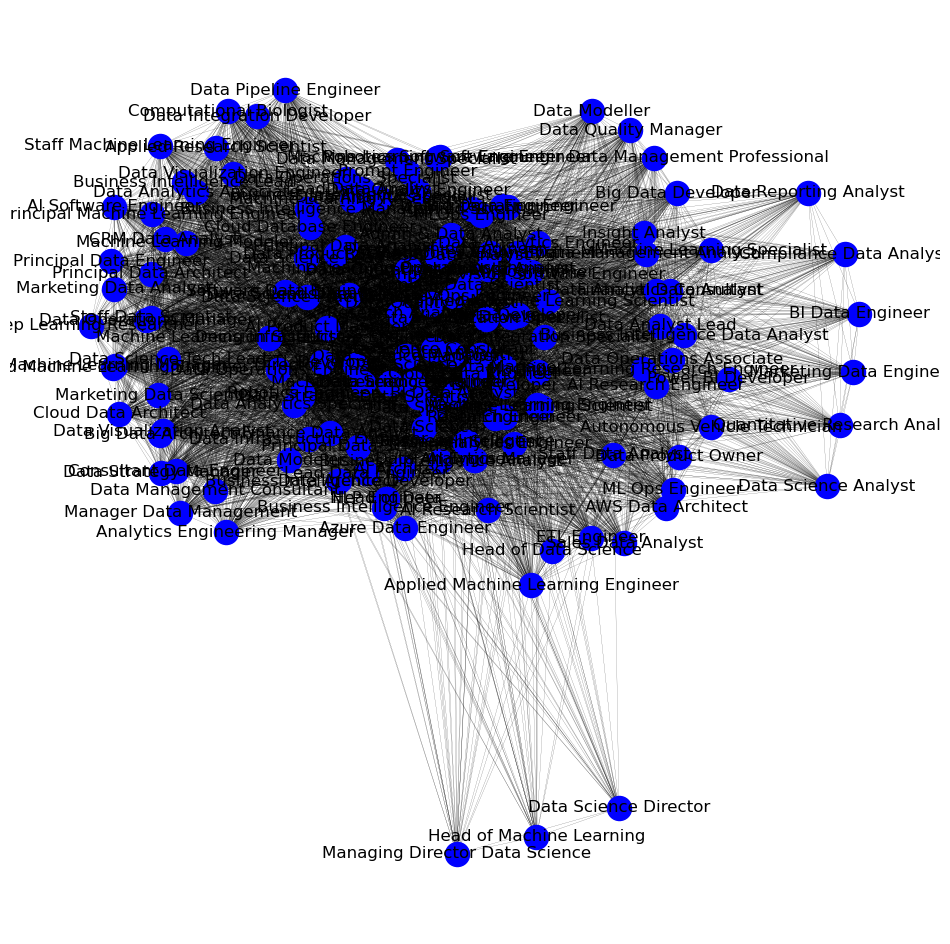

In [5]:
from networkx.algorithms import bipartite
job_title = list(set(job_title))  
G = bipartite.weighted_projected_graph(B, job_title)
plt.figure(figsize=(12, 12))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(
    G,
    layout,
    nodelist=job_title,
    node_size=300,
    node_color='blue'
)

nx.draw_networkx_edges(G, layout, width=0.1, edge_color="#000000")

node_labels = dict(zip(job_title, job_title))
nx.draw_networkx_labels(G, layout, labels=node_labels)

plt.axis('off')
plt.show()

In [6]:

labels = nx.get_edge_attributes(G,'weight')
data = [{'source': key[0], 'target': key[1], 'weight': value} for key, value in labels.items()]
df2 = pd.DataFrame(data)
df2.to_csv(r'dothi1phia_full.csv', index = False, header = True)

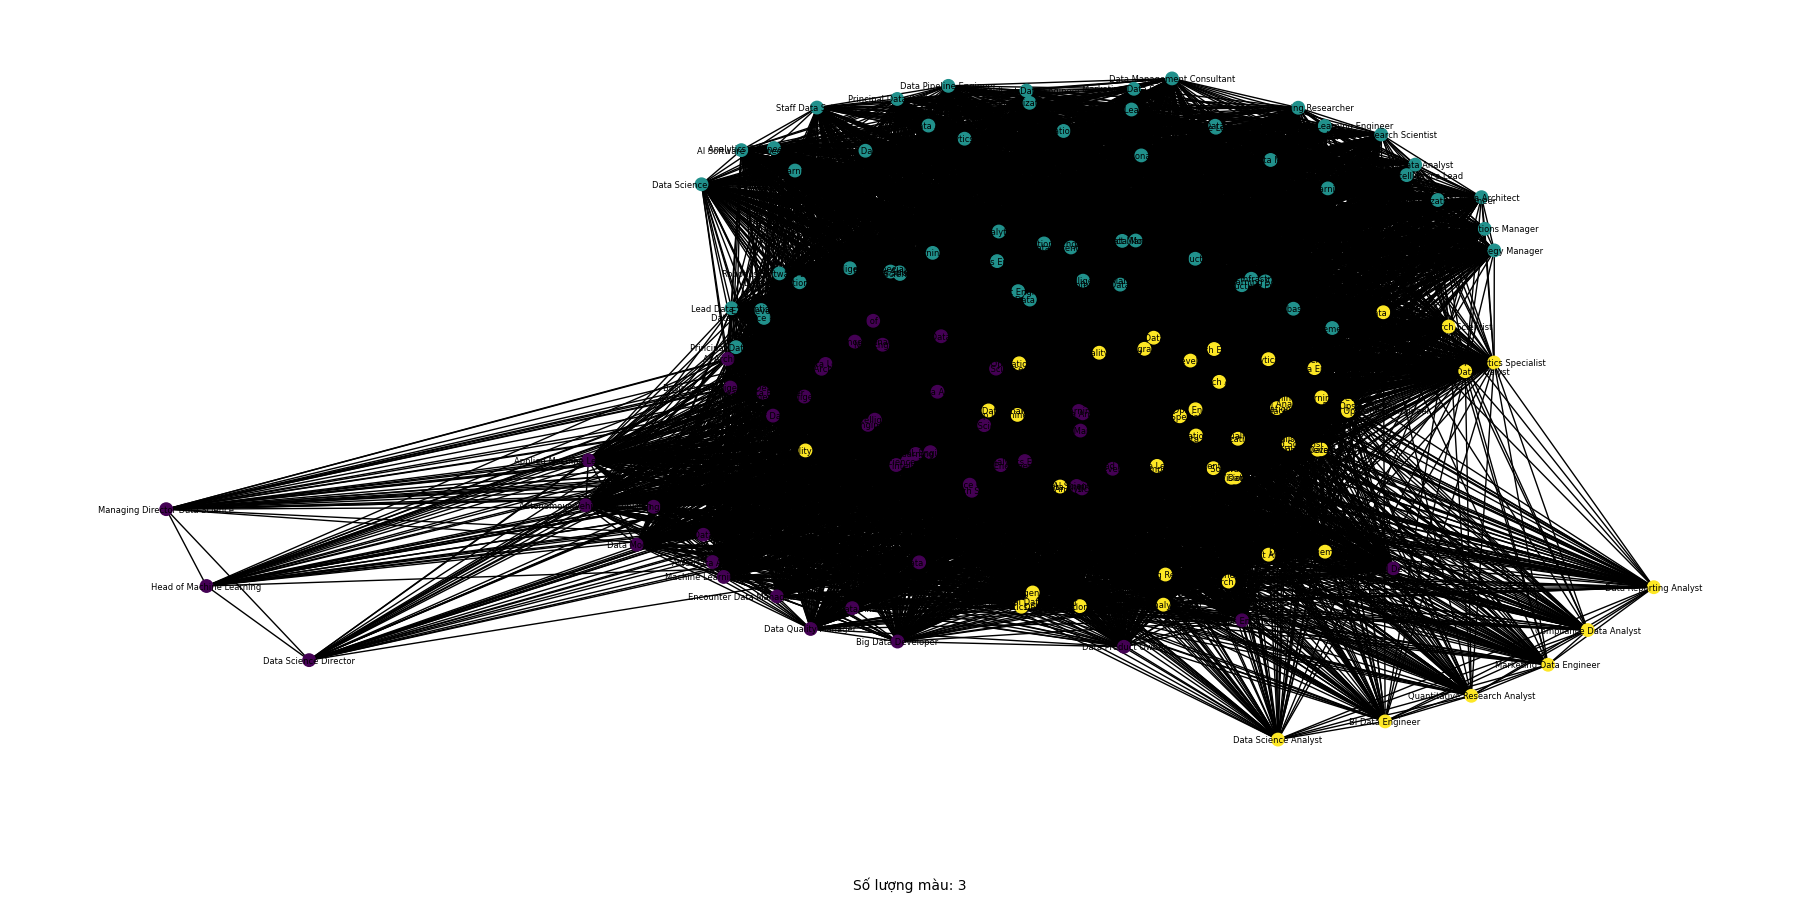

In [7]:
import networkx as nx
from community import community_louvain

partition = community_louvain.best_partition(G)

num_colors = len(set(partition.values()))

pos = nx.spring_layout(G)
plt.figure(figsize=(18, 8))
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos=pos, node_color=colors, cmap='viridis',node_size=80, with_labels=True, font_size=6, width=1.0)

plt.text(0.5, -0.1, f"Số lượng màu: {num_colors}", transform=plt.gca().transAxes, ha="center")
#num_colors = min(len(set(partition.values())), 8)
# Hiển thị đồ thị
plt.show()

In [8]:
values = list(partition.values())

print('Số cụm', len(np.unique(values)))

for i in range(len(np.unique(values))):
  print("-- Cụm ", i+1, " --")
  for name, k in partition.items():
    if k ==i:
      print(name)

Số cụm 3
-- Cụm  1  --
Staff Data Analyst
Big Data Developer
Data Science Manager
Principal Data Scientist
NLP Engineer
Autonomous Vehicle Technician
Data Science Director
Director of Data Science
AI Architect
Data Architect
Data Quality Manager
BI Developer
Encounter Data Management Professional
Data Manager
Head of Data
Data Science
Data Product Owner
AI Scientist
Business Intelligence Engineer
Lead Data Engineer
BI Data Analyst
Analytics Engineer
Business Intelligence Developer
Business Intelligence
Data Engineer
Data Analyst
Data Lead
Head of Machine Learning
Sales Data Analyst
AI Engineer
Data Science Engineer
ML Ops Engineer
Data Analytics Manager
Data Scientist
AWS Data Architect
Machine Learning Specialist
Applied Machine Learning Engineer
ETL Engineer
Machine Learning Scientist
Business Intelligence Analyst
Power BI Developer
Managing Director Data Science
Head of Data Science
ML Engineer
Research Scientist
Data Science Consultant
Data Modeller
Machine Learning Engineer
-- Cụm

In [9]:
List0 = []
for name, k in partition.items():
  if k==0:
    print(name)
    List0.append(name)
Nhom0 = df.query("job_title in @List0")
Nhom0

Staff Data Analyst
Big Data Developer
Data Science Manager
Principal Data Scientist
NLP Engineer
Autonomous Vehicle Technician
Data Science Director
Director of Data Science
AI Architect
Data Architect
Data Quality Manager
BI Developer
Encounter Data Management Professional
Data Manager
Head of Data
Data Science
Data Product Owner
AI Scientist
Business Intelligence Engineer
Lead Data Engineer
BI Data Analyst
Analytics Engineer
Business Intelligence Developer
Business Intelligence
Data Engineer
Data Analyst
Data Lead
Head of Machine Learning
Sales Data Analyst
AI Engineer
Data Science Engineer
ML Ops Engineer
Data Analytics Manager
Data Scientist
AWS Data Architect
Machine Learning Specialist
Applied Machine Learning Engineer
ETL Engineer
Machine Learning Scientist
Business Intelligence Analyst
Power BI Developer
Managing Director Data Science
Head of Data Science
ML Engineer
Research Scientist
Data Science Consultant
Data Modeller
Machine Learning Engineer


,experience_level,job_title
0,MI,Data Scientist
1,MI,BI Data Analyst
3,MI,ML Engineer
6,SE,Data Science Manager
7,EN,Data Scientist
...,...,...
14010,MI,Lead Data Engineer
14520,EN,AI Engineer
14741,MI,Head of Data
14751,EN,Data Analytics Manager


In [10]:
List1 = []
for name, k in partition.items():
  if k==1:
    print(name)
    List1.append(name)
Nhom1 = df.query("job_title in @List1")
Nhom1

Computational Biologist
Cloud Database Engineer
Prompt Engineer
Robotics Software Engineer
CRM Data Analyst
Data Operations Engineer
Applied Research Scientist
Machine Learning Software Engineer
Data Strategist
Data Integration Developer
Data Pipeline Engineer
AI Software Engineer
Data Operations Specialist
Data Science Practitioner
Manager Data Management
Lead Data Analyst
Data Analytics Lead
AI Product Manager
Data Infrastructure Engineer
Business Intelligence Specialist
Data Operations Manager
Marketing Data Analyst
Lead Data Scientist
Business Intelligence Lead
Data Strategy Manager
Data Modeler
Marketing Data Scientist
Lead Machine Learning Engineer
Staff Machine Learning Engineer
Big Data Architect
Data Visualization Analyst
Machine Learning Modeler
Data Science Lead
Machine Learning Manager
Decision Scientist
Cloud Data Architect
Data Visualization Engineer
Deep Learning Researcher
Principal Machine Learning Engineer
Principal Data Analyst
Principal Data Engineer
Business Intell

,experience_level,job_title
4,SE,Lead Machine Learning Engineer
13,SE,Lead Data Scientist
20,MI,Lead Data Analyst
24,SE,Principal Data Architect
38,MI,Machine Learning Software Engineer
...,...,...
12446,MI,Data Scientist Lead
12621,MI,Data Management Specialist
13130,MI,Principal Data Analyst
13802,SE,Applied Research Scientist


In [11]:
List2 = []
for name, k in partition.items():
  if k==2:
    print(name)
    List2.append(name)
Nhom2 = df.query("job_title in @List2")
Nhom2

Admin & Data Analyst
Applied Data Scientist
Finance Data Analyst
Insight Analyst
Data Operations Associate
Data Management Analyst
BI Analyst
Applied Machine Learning Scientist
Applied Scientist
Data Integration Specialist
Data Integration Engineer
Business Intelligence Data Analyst
AI Developer
Data Specialist
Data Analytics Consultant
AI Programmer
Machine Learning Research Engineer
Research Engineer
Computer Vision Engineer
Data Quality Analyst
Data Visualization Specialist
Marketing Data Engineer
Machine Learning Operations Engineer
Data Developer
Data Analytics Specialist
MLOps Engineer
Financial Data Analyst
Compliance Data Analyst
Computer Vision Software Engineer
AI Research Engineer
Deep Learning Engineer
BI Data Engineer
Azure Data Engineer
Business Data Analyst
Quantitative Research Analyst
Data Reporting Analyst
Data Analytics Engineer
Data Operations Analyst
Data Science Analyst
Product Data Analyst
Research Analyst
Data DevOps Engineer
Data Quality Engineer
Big Data Engin

,experience_level,job_title
9,EN,Research Engineer
11,EN,AI Programmer
16,EN,Applied Machine Learning Scientist
23,SE,Data Integration Specialist
31,MI,Applied Machine Learning Scientist
...,...,...
14583,MI,Admin & Data Analyst
14719,MI,AI Programmer
14800,EN,Data Quality Engineer
14818,EN,Data Analytics Engineer


In [12]:
df.to_excel (r'Louvain_Cum.xlsx', sheet_name='pah_wikp_combo', index = False, header=True)
with pd.ExcelWriter('Louvain_Cum.xlsx',
                    mode='a') as writer:  
    Nhom0.to_excel(writer, sheet_name='Louvain_Nhom1',index = False, header=True)                
    Nhom1.to_excel(writer, sheet_name='Louvain_Nhom2',index = False, header=True)
    Nhom2.to_excel(writer, sheet_name='Louvain_Nhom3',index = False, header=True)

## Girvan Newman

[['Staff Data Analyst', 'Admin & Data Analyst', 'Computational Biologist', 'Applied Data Scientist', 'Cloud Database Engineer', 'Big Data Developer', 'Data Science Manager', 'Principal Data Scientist', 'Finance Data Analyst', 'Prompt Engineer', 'Robotics Software Engineer', 'Insight Analyst', 'Data Operations Associate', 'NLP Engineer', 'CRM Data Analyst', 'Data Management Analyst', 'BI Analyst', 'Autonomous Vehicle Technician', 'Data Operations Engineer', 'Applied Machine Learning Scientist', 'Applied Scientist', 'Applied Research Scientist', 'Data Science Director', 'Director of Data Science', 'Data Integration Specialist', 'Data Integration Engineer', 'Business Intelligence Data Analyst', 'Machine Learning Software Engineer', 'Data Strategist', 'Data Integration Developer', 'Data Pipeline Engineer', 'AI Developer', 'AI Architect', 'Data Operations Specialist', 'AI Software Engineer', 'Data Architect', 'Data Science Practitioner', 'Manager Data Management', 'Data Specialist', 'Data Q

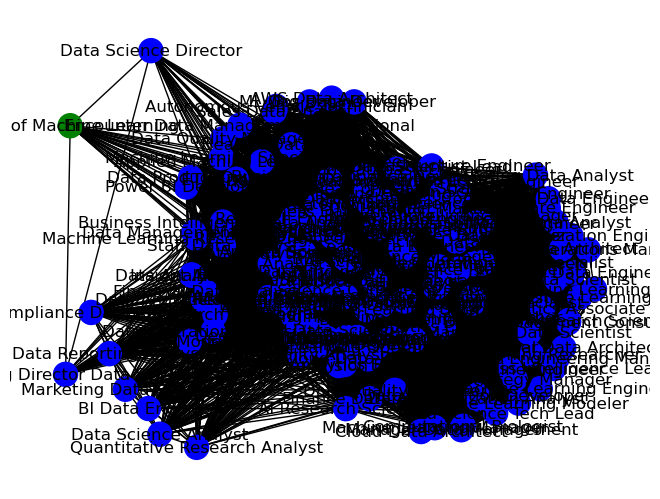

In [13]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(G)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [14]:
ListGV01 = node_groups[0]
ListGV02 = node_groups[1]

Group01 = df.query("job_title in @ListGV01")
Group02 = df.query("job_title in @ListGV02")

In [15]:
df.to_excel (r'GirvanNewman.xlsx', sheet_name='Data', index = False, header=True)
with pd.ExcelWriter('GirvanNewman.xlsx',
                    mode='a') as writer:  
    Group01.to_excel(writer, sheet_name='Girvan_Group01',index = False, header=True)                
    Group02.to_excel(writer, sheet_name='Girvan_Group02',index = False, header=True)

## K-Means

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


KMeans(n_clusters=4)
153


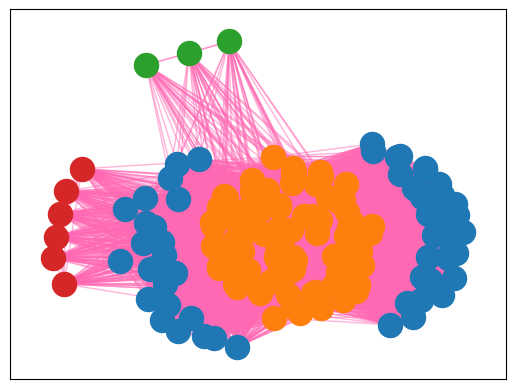

Groups:
Group 1 : ['Staff Data Analyst', 'Computational Biologist', 'Big Data Developer', 'Insight Analyst', 'Data Operations Associate', 'CRM Data Analyst', 'Data Management Analyst', 'Autonomous Vehicle Technician', 'Applied Research Scientist', 'Business Intelligence Data Analyst', 'Data Integration Developer', 'Data Pipeline Engineer', 'AI Software Engineer', 'Manager Data Management', 'Data Quality Manager', 'Data Analytics Consultant', 'Encounter Data Management Professional', 'Data Operations Manager', 'Machine Learning Research Engineer', 'Marketing Data Analyst', 'Data Product Owner', 'Business Intelligence Lead', 'Data Strategy Manager', 'Marketing Data Scientist', 'Lead Machine Learning Engineer', 'Staff Machine Learning Engineer', 'Big Data Architect', 'Data Visualization Analyst', 'Machine Learning Modeler', 'Financial Data Analyst', 'AI Research Engineer', 'Sales Data Analyst', 'Machine Learning Manager', 'Cloud Data Architect', 'Data Visualization Engineer', 'Deep Learni

In [16]:
from sklearn.cluster import KMeans
nodes = list(G.nodes())
edges = list(G.edges())
node_degree = [G.degree(node) for node in G.nodes()]
degree_x =[[degree] for degree in node_degree]
degree_kmeans = KMeans(n_clusters=4).fit(degree_x)
degree_labels = degree_kmeans.labels_
print(degree_kmeans)

print(len(nodes))
pos = nx.spring_layout(G)
for i in range(len(nodes)):
  node = nodes[i]
  color = degree_labels[i]
  nx.draw_networkx_nodes(G, pos, [node], node_color=plt.cm.tab10(color))
nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.5, edge_color="hotpink", node_size=100)
plt.show()

groups = {}
for node, label in zip(nodes, degree_labels):
    if label not in groups:
        groups[label] = []
    groups[label].append(node)

print("Groups:")
for label, nodes in groups.items():
    print("Group", label + 1, ":", nodes)
    value = nodes
    filter_data = df[df['job_title'].isin(value)]
    name = 'nhom' + str(label) +'.xlsx'
    filter_data.to_excel(name, index=False)